In [1]:
import pandas as pd
from matplotlib.pyplot import *
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy.stats as stats
from fbprophet import Prophet
from scipy.integrate import odeint
pd.options.display.float_format = "{:.2f}".format


#I've set April 25th,2020 as the cutoff date for all COVID data

Importing plotly failed. Interactive plots will not work.


In [2]:
#Used to create the dataframes for the total deaths/confirmed cases and the predictors for the correlation visualizations

US_deaths_df = pd.read_csv(r'C:\Users\Admin\Desktop\Project_Data\time_series_covid19_deaths_US.csv')
US_predictors = pd.read_csv(r'C:\Users\Admin\Desktop\Project_Data\COVID19_State.csv')
US_confirmed_df = pd.read_csv(r'C:\Users\Admin\Desktop\Project_Data\time_series_covid19_confirmed_US.csv')

In [3]:
#
US_deaths_df.groupby(['Province_State']).sum()

,UID,code3,FIPS,Lat,Long_,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,5796241491.00,57960,241491.00,2203.25,-5809.58,4903185,0,0,0,0,...,118,133,148,153,157,163,183,196,202,209
Alaska,2604232344.00,26040,232344.00,1747.58,-4229.32,731545,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
American Samoa,16.00,16,60.00,-14.27,-170.13,55641,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,1428230216.00,14280,230216.00,505.14,-1671.95,7278717,0,0,0,0,...,155,164,183,180,184,191,208,231,249,266
Arkansas,6468550635.00,64680,550635.00,2618.39,-6932.55,3017804,0,0,0,0,...,33,37,37,38,39,41,42,42,45,47
California,5040521376.00,50400,521376.00,2194.95,-7002.26,39512223,0,0,0,0,...,860,956,1037,1140,1177,1225,1282,1421,1533,1621
Colorado,5544685999.00,55440,685999.00,2491.87,-6751.12,5758736,0,0,0,0,...,328,355,372,389,420,420,483,506,552,674
Connecticut,840242082.00,8400,242082.00,332.91,-581.25,3565287,0,0,0,0,...,868,971,1036,1086,1127,1331,1423,1544,1639,1767
Delaware,420200029.00,4200,200029.00,117.33,-226.60,973764,0,0,0,0,...,46,55,61,67,67,72,82,89,92,100


In [4]:
#Creating predictor dataframes for New York, Viriginia, and California deaths
#Didn't end up using this was just testing something


New_York_predictors = US_predictors[US_predictors['State']=='New York']
California_predictors = US_predictors[US_predictors['State']=='California']
Virginia_predictors = US_predictors[US_predictors['State']=='Virignia']


In [5]:
#Created a new dataframe that only had predictors I felt were related to health care/spending
US_predic_small = US_predictors[["Tested","Infected","Deaths","Population","ICU Beds","GDP","Physicians","Hospitals","Health Spending"]]

In [6]:
#This is the aggregation of predictors for all 50 states
US_predic_small.describe()

,Tested,Infected,Deaths,Population,ICU Beds,GDP,Physicians,Hospitals,Health Spending
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,88298.06,16914.29,867.18,6496450.82,1466.41,61497.33,19711.67,101.92,8332.16
std,113065.18,39209.39,2325.42,7450657.46,1562.12,22648.27,22532.92,88.88,1256.75
min,11473.00,337.00,9.00,567025.00,94.00,37948.00,1172.00,7.00,5982.00
25%,23613.50,2253.00,58.50,1802113.00,327.00,51156.00,5656.00,44.50,7390.00
50%,51548.00,5052.00,191.00,4499692.00,1134.00,57492.00,12205.00,89.00,8107.00
75%,101693.50,14939.50,693.00,7587794.50,1841.50,65971.50,23991.50,129.50,9095.50
max,695920.00,263460.00,15740.00,39937489.00,7338.00,200277.00,112906.00,523.00,11944.00


In [9]:
#Used to get the dates from the time series datasheet 
cols = US_deaths_df.keys()

US_deaths = US_deaths_df.loc[:, cols[12]:cols[-1]]
US_confirm = US_confirmed_df.loc[:,cols[12]:cols[-1]]

In [24]:
#Creates a descending list of the total deaths in each state/province....its a bit ugly I know lol
All_US_Deaths_grouped = US_deaths_df[['Province_State',cols[-1]]]
x = (All_US_Deaths_grouped.groupby('Province_State')[cols[-1]].sum())
x.sort_values(ascending = False )


Province_State
New York                    21411
New Jersey                   5683
Michigan                     3085
Massachusetts                2556
Illinois                     1795
Connecticut                  1767
Pennsylvania                 1747
Louisiana                    1660
California                   1621
Florida                      1046
Georgia                       899
Maryland                      798
Indiana                       741
Washington                    722
Ohio                          690
Colorado                      674
Texas                         624
Virginia                      411
North Carolina                294
Missouri                      272
Arizona                       266
Wisconsin                     263
Minnesota                     221
Mississippi                   209
Alabama                       209
Rhode Island                  202
Kentucky                      200
Nevada                        197
Oklahoma                      188

In [19]:
#Total Sum of all deaths in the US up to April 25th 2020
All_Deaths = US_deaths_df[cols[-1]]
All_Deaths.sum()
All_Deaths

51949

In [ ]:
#Total sum of all confirmed cases up to April 25th 2020
All_Confirmed = US_confirmed_df[cols[-1]]
All_Confirmed.sum()

In [11]:
#Stores the column headers to loop through for later usage
dates = US_deaths.keys()

In [8]:
#Empty lists to store the amount of deaths for each state for each day
NY_Deaths = []
California_Deaths = []
Virginia_Deaths = []
US_Deaths_Tot = []
US_Confirmed_Tot = []

In [12]:
#Creates the running sum for Death counts

for i in dates:
    NY_Deaths.append(US_deaths_df[US_deaths_df['Province_State']=='New York'][i].sum())
    California_Deaths.append(US_deaths_df[US_deaths_df['Province_State']=='California'][i].sum())
    Virginia_Deaths.append(US_deaths_df[US_deaths_df['Province_State']=='Virginia'][i].sum())
    US_Deaths_Tot.append(US_deaths[i].sum())
    US_Confirmed_Tot.append(US_confirm[i].sum())

In [13]:
#Converts the dates into "Days since January 20"
days_since = np.array([i for i in range(len(dates))]).reshape(-1,1)

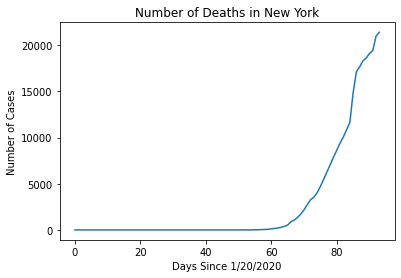

In [11]:
#Visualiztion of the running sum of total deaths in New York (I say since 1/20/2020 since that was the initital starting point for the John Hopkins dataset)
plt.plot(days_since,NY_Deaths)
plt.xlabel('Days Since 1/20/2020')
plt.ylabel('Number of Cases')
plt.title('Number of Deaths in New York')

plt.show()

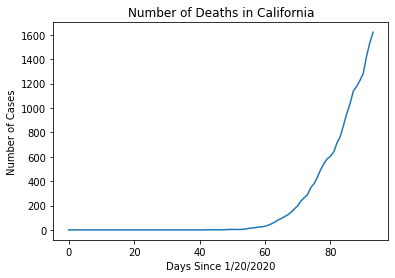

In [12]:
#Visualiztion of the running sum of total deaths in California
plt.plot(days_since,California_Deaths)
plt.xlabel('Days Since 1/20/2020')
plt.ylabel('Number of Cases')
plt.title('Number of Deaths in California')
plt.show()

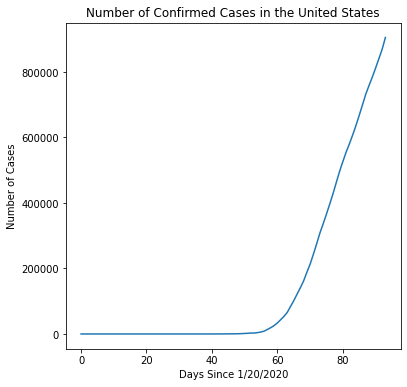

In [17]:
#Visualiztion of the running sum of total confirmed in the United States
plt.figure(figsize=(6,6))
plt.plot(days_since,US_Confirmed_Tot)
plt.xlabel('Days Since 1/20/2020')
plt.ylabel('Number of Cases')
plt.title('Number of Confirmed Cases in the United States')
plt.show()

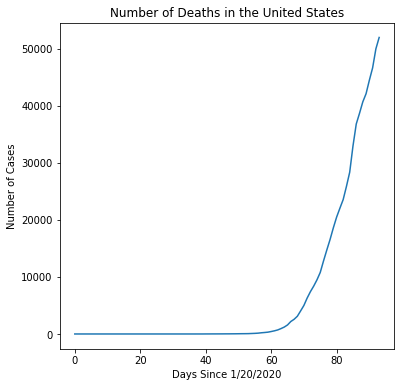

In [18]:
#Visualiztion of the running sum of total deaths in California
plt.figure(figsize=(6,6))
plt.plot(days_since, US_Deaths_Tot)

plt.xlabel('Days Since 1/20/2020')
plt.ylabel('Number of Cases')
plt.title('Number of Deaths in the United States')
plt.show()

In [15]:
#To create the visualizations for the forecasting visualizations had to do some formatting changes in the dates
new_dates = []
for date in dates:
    new_date = date.replace('/','-')
    new_dates.append(new_date)
    
  

In [16]:
#Prophet dataframes have to have the date column named "ds" and the actual data (in this case the death counts) as "y"
Virginia_Deaths_df = pd.DataFrame({"ds":new_dates,"y":Virginia_Deaths})
Cali_Deaths_df = pd.DataFrame({"ds":new_dates,"y":California_Deaths})
NY_Deaths_df = pd.DataFrame({"ds":new_dates,"y":NY_Deaths})
US_Deaths_df = pd.DataFrame({"ds":new_dates,"y":US_Deaths_Tot})

In [17]:
#Used to create the prophet visualizes I follwed the steps from https://facebook.github.io/prophet/docs/quick_start.html#python-api
Virginia_predic = Prophet()
Virginia_predic.fit(Virginia_Deaths_df)

NY_predic = Prophet()
NY_predic.fit(NY_Deaths_df)

Cali_predic = Prophet()
Cali_predic.fit(Cali_Deaths_df)

US_predic = Prophet()
US_predic.fit(US_Deaths_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Predicted Deaths in 60 Days For Virginia')

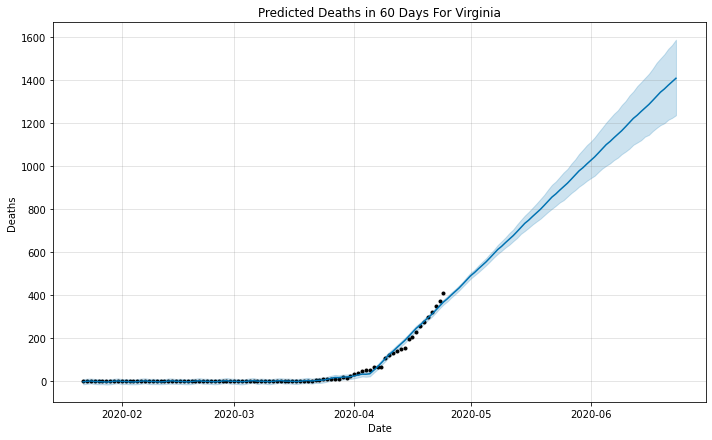

In [18]:
#Creates the "future" forecasting where periods represents 60 days from the end of the original dataset
Virginia_future = Virginia_predic.make_future_dataframe(periods=60)

Virginia_forceast = Virginia_predic.predict(Virginia_future)

fig = Virginia_predic.plot(Virginia_forceast,xlabel="Date",ylabel='Deaths')
ax = fig.gca()
ax.set_title("Predicted Deaths in 60 Days For Virginia")

In [19]:
#Ignore this one 
fig2 = Virginia_predic.plot_components(Virginia_forceast)

NameError: name 'forecast' is not defined

Text(0.5, 1.0, 'Predicted Deaths in 60 Days For New York')

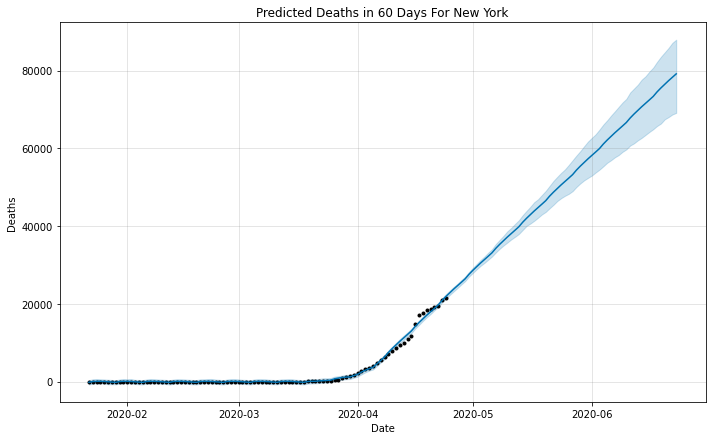

In [20]:
#Same thing but for New York deaths
NY_future = NY_predic.make_future_dataframe(periods=60)

NY_forceast = NY_predic.predict(NY_future)

fig = NY_predic.plot(NY_forceast,xlabel="Date",ylabel='Deaths')
ax = fig.gca()
ax.set_title("Predicted Deaths in 60 Days For New York")

Text(0.5, 1.0, 'Predicted Deaths in 60 Days For California')

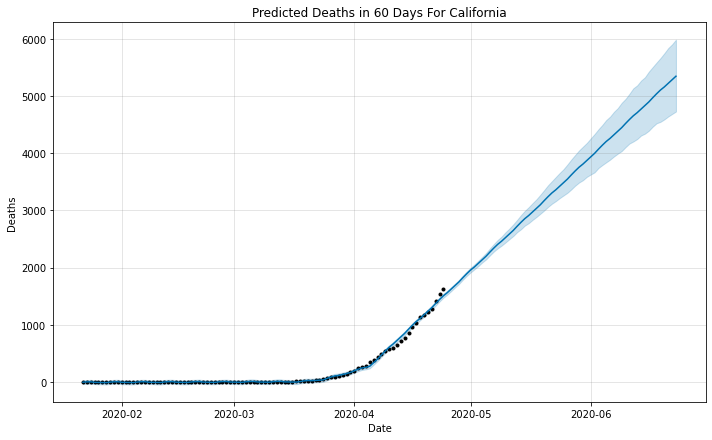

In [21]:
#Same thing but for California deaths
Cali_future = Cali_predic.make_future_dataframe(periods=60)

Cali_forceast = Cali_predic.predict(Cali_future)

fig = Cali_predic.plot(Cali_forceast,xlabel="Date",ylabel='Deaths')
ax = fig.gca()
ax.set_title("Predicted Deaths in 60 Days For California")


Text(0.5, 1.0, 'Predicted Deaths in 60 Days For the United States')

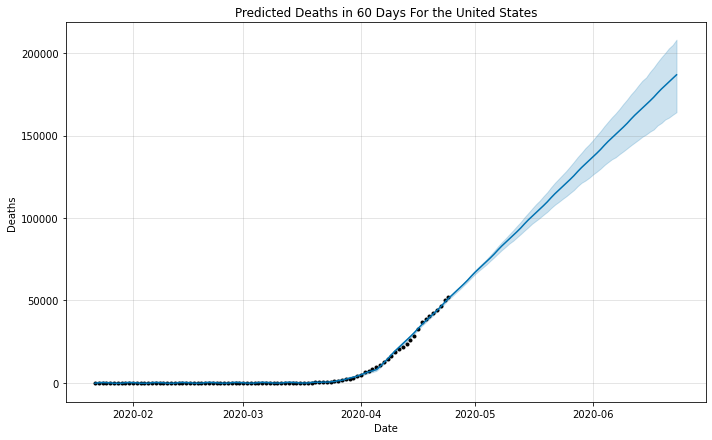

In [22]:
#Same thing but for deaths in the whole United States
US_future = US_predic.make_future_dataframe(periods=60)

US_forceast = US_predic.predict(US_future)

fig = US_predic.plot(US_forceast,xlabel="Date",ylabel='Deaths')
ax = fig.gca()
ax.set_title("Predicted Deaths in 60 Days For the United States")


AttributeError: module 'seaborn' has no attribute 'plt'

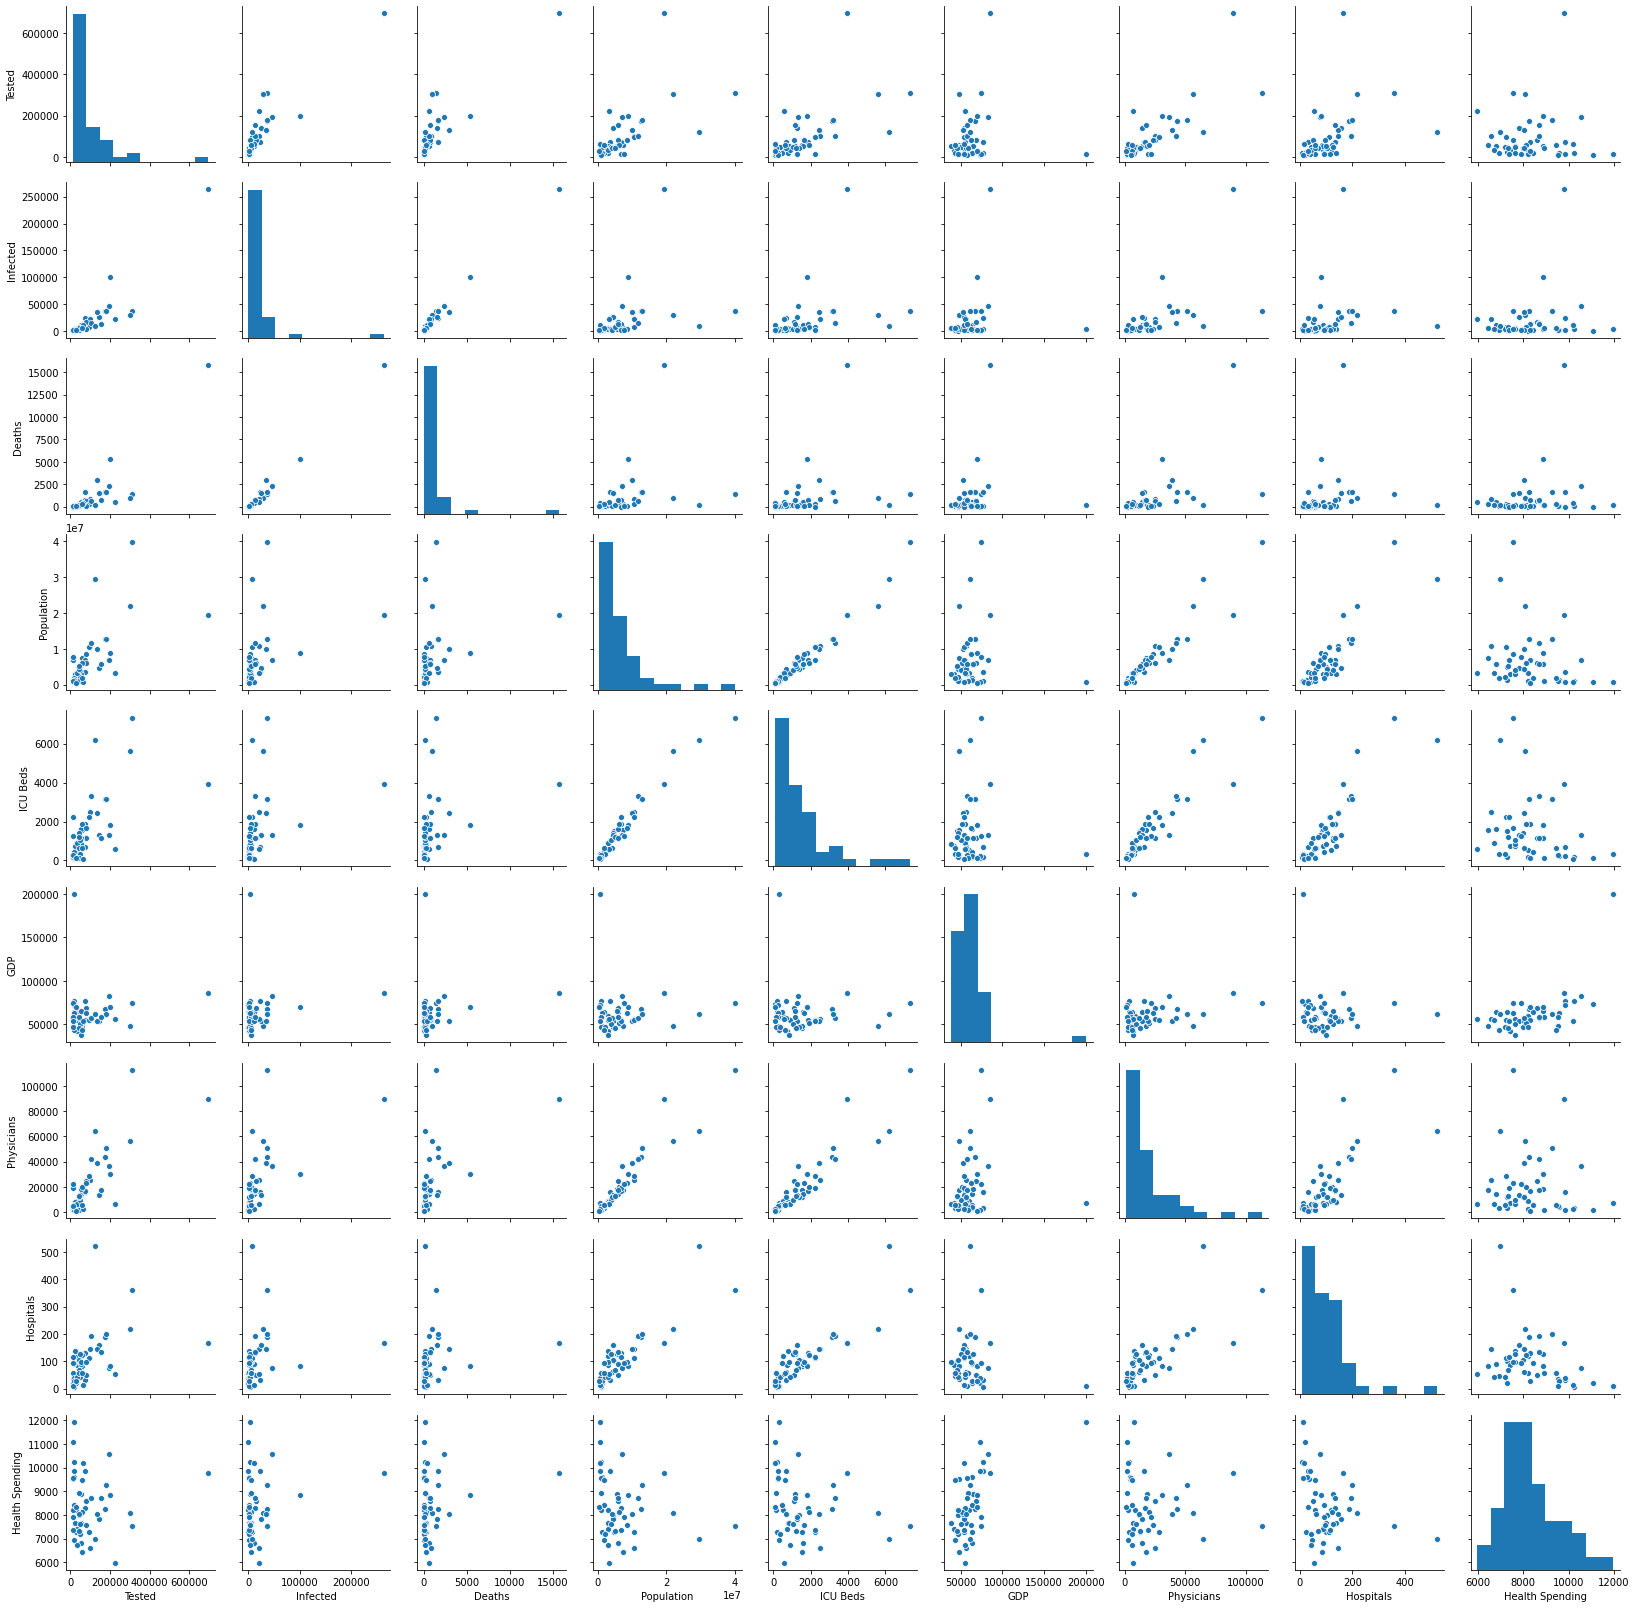

In [27]:
#Creates the correlation matrix for the health care predictors
corrmatrix = US_predic_small.corr()


#Was testing a few different correlation visualizations didn't like this one but kept it in the code
sns.pairplot(US_predic_small)
sns.plt.show()

In [35]:

#https://towardsdatascience.com/infectious-disease-modelling-part-i-understanding-sir-28d60e29fdfc this article goes into detail on how to use the model and it's really easy to follow.
#https://colab.research.google.com/github/hf2000510/infectious_disease_modelling/blob/master/part_one.ipynb took the code from here and changed the parameters for our needs
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt



In [ ]:

#Represents the population of New York
N = 19440469

beta = 1.0  # infected person infects 1 other person per day
D = 14.0 # infections lasts for 14 days
gamma = 1.0 / D

S0, I0, R0 = (N-1), 1, 0  # initial conditions: SO is the suspecitble population, IO is those who are infected in this case we start with one person, and R0 is 0 because no one has recovered from the virus yet.



In [ ]:
t = np.linspace(0, 94, 94) # Grid of time points (in days) this represents how the outbreak would look over 94 days
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

In [31]:
#Used to plot the SIR model for New York 

def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  
  ax.set_xlabel('Time (days)')
  ax.set_title("SIR Model Simulation for New York over 80 Days")
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.get_yaxis().get_major_formatter().set_scientific(False)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();



In [32]:
plotsir(t, S, I, R) #Calls the function to plot everything

NameError: name 'S' is not defined

In [33]:
#Same code as above just changed to represent the entire U.S. population

#Represents the U.S. Population size
N = 328000000 
beta = 1.0  # infected person infects 1 other person per day
D = 14.0 # infections lasts four days
gamma = 1.0 / D

S0, I0, R0 = (N-1), 1, 0  # initial conditions: one infected, rest susceptible



In [36]:
t = np.linspace(0, 94, 94) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

In [37]:

def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  
  ax.set_xlabel('Time (days)')
  ax.set_title("SIR Model Simulation for United States Over 80 Days")
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.get_yaxis().get_major_formatter().set_scientific(False)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();


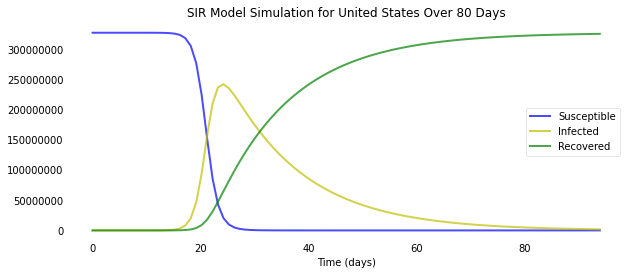

In [38]:
plotsir(t, S, I, R)

In [ ]:
#Didn't use this correlation plot
labels = [c for c in US_predic_small.columns]
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.
ax.matshow(US_predic_small.corr(),cmap=plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(lables)

plt.show()


In [ ]:
#Didn't use this correlation plot either
mask = np.triu(np.ones_like(US_predic_small.corr(),dtype=np.bool))
f,ax = plt.subplots(figsize=(12,6))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(US_predic_small.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

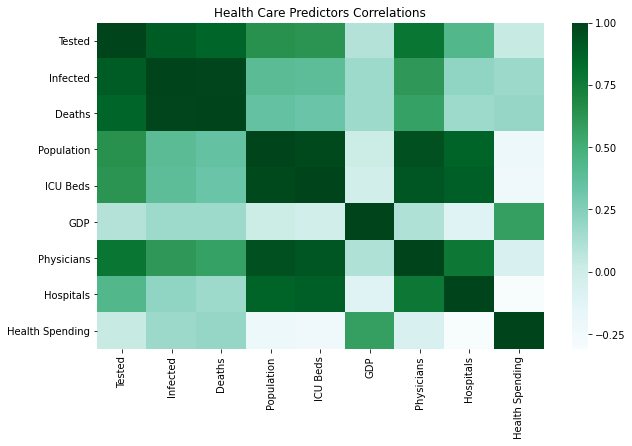

In [25]:
#Ended up liking this one you can look into the sns library and look at various cmap colors if you want to change how it looks
plt.subplots(figsize=(10,6))
plt.title("Health Care Predictors Correlations")
sns.heatmap(US_predic_small.corr(),xticklabels=US_predic_small.corr().columns,yticklabels=US_predic_small.corr().columns,cmap='BuGn')

In [28]:
print(corrmatrix)

#Creates the same visualzation above in a table format
corrmatrix.style.background_gradient(cmap='coolwarm').set_precision(2)

                 Tested  Infected  Deaths  Population  ICU Beds   GDP  \
Tested             1.00      0.90    0.87        0.64      0.63  0.10   
Infected           0.90      1.00    0.99        0.40      0.38  0.17   
Deaths             0.87      0.99    1.00        0.35      0.33  0.17   
Population         0.64      0.40    0.35        1.00      0.98  0.02   
ICU Beds           0.63      0.38    0.33        0.98      1.00 -0.02   
GDP                0.10      0.17    0.17        0.02     -0.02  1.00   
Physicians         0.79      0.61    0.57        0.95      0.93  0.11   
Hospitals          0.43      0.21    0.17        0.87      0.89 -0.10   
Health Spending    0.04      0.18    0.19       -0.22     -0.24  0.58   

                 Physicians  Hospitals  Health Spending  
Tested                 0.79       0.43             0.04  
Infected               0.61       0.21             0.18  
Deaths                 0.57       0.17             0.19  
Population             0.95       0.8

,Tested,Infected,Deaths,Population,ICU Beds,GDP,Physicians,Hospitals,Health Spending
Tested,1,0.9,0.87,0.64,0.63,0.099,0.79,0.43,0.038
Infected,0.9,1,0.99,0.4,0.38,0.17,0.61,0.21,0.18
Deaths,0.87,0.99,1,0.35,0.33,0.17,0.57,0.17,0.19
Population,0.64,0.4,0.35,1,0.98,0.018,0.95,0.87,-0.22
ICU Beds,0.63,0.38,0.33,0.98,1,-0.019,0.93,0.89,-0.24
GDP,0.099,0.17,0.17,0.018,-0.019,1,0.11,-0.1,0.58
Physicians,0.79,0.61,0.57,0.95,0.93,0.11,1,0.77,-0.058
Hospitals,0.43,0.21,0.17,0.87,0.89,-0.1,0.77,1,-0.31
Health Spending,0.038,0.18,0.19,-0.22,-0.24,0.58,-0.058,-0.31,1
